In [88]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn

## 0. Read data

In [3]:
data = pd.read_csv('./data/train.csv')
data.shape

(90000, 54)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [5]:
data_test = pd.read_csv('./data/hidden_test.csv')
data_test.shape

(10000, 53)

In [6]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


## 1. Data Analysis 

### 1.1. Types and nan count

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [10]:
count = np.isinf(data).values.sum()
print("It contains " + str(count) + " infinite values")

It contains 0 infinite values


### 1.2. Distributions

<AxesSubplot:>

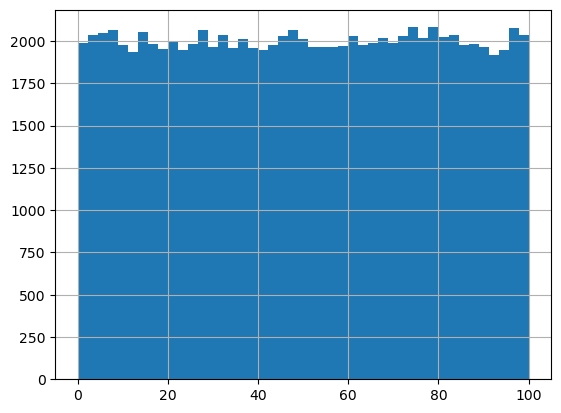

In [14]:
# Target has uniform distribution 
data.target.hist(bins='auto')

In [73]:
data.iloc[:, 40:60]

,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,14.128165,4.484611,2.652550,5.252173,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,6.283776,6.132219,0.105138,14.736929,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,1.338452,12.764249,8.593937,7.296410,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,2.362455,2.981418,14.077920,13.943818,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309


In [87]:
# data['53'].hist(bins='auto')
# data['4'].value_counts()

<AxesSubplot:>

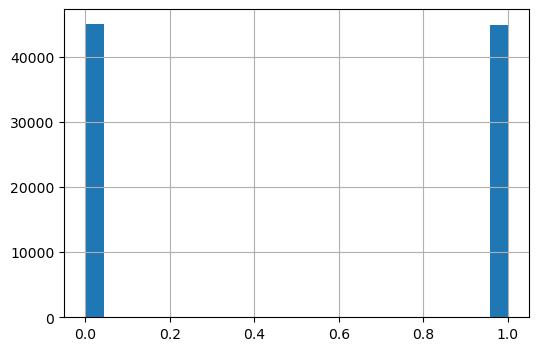

In [112]:
plt.rcParams["figure.figsize"] = (6,4)
data['8'].hist(bins='auto')

<AxesSubplot:>

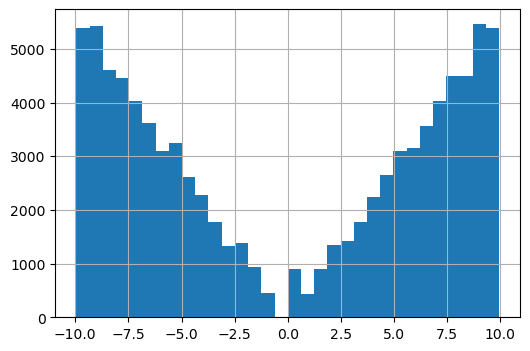

In [114]:
data['6'].hist(bins='auto')

In [121]:
data.loc[data['6'] > 0, ['8', '6']]

,8,6
1,1,7.810250
2,1,8.602325
3,1,8.306624
4,1,8.124038
5,1,5.830952
...,...,...
89990,1,5.916080
89993,1,2.449490
89995,1,4.898979
89997,1,6.164414


In [122]:
# Feature 8 is strongly correlated with feature 6. Feature 8 is indicator that feature 6 is greater than 0    
data.loc[:, ['8', '6']].corr()

,8,6
8,1.000000,0.940016
6,0.940016,1.000000


### 1.3. Correlations

In [101]:
corr_matrix = data.corr()

In [102]:
# Any feature has strong correlation
corr_matrix['target'].abs().sort_values(ascending=False)

target    1.000000
7         0.012103
40        0.007216
26        0.006370
39        0.006283
35        0.006267
1         0.005545
50        0.005243
31        0.005077
29        0.004785
51        0.004507
25        0.004276
38        0.003845
41        0.003770
28        0.003451
10        0.003396
44        0.003092
17        0.002953
42        0.002876
21        0.002874
3         0.002807
36        0.002624
49        0.002473
0         0.002427
33        0.002301
5         0.002125
12        0.002016
15        0.001653
37        0.001642
11        0.001566
19        0.001520
9         0.001504
27        0.001459
34        0.001331
4         0.001300
23        0.001280
52        0.001203
18        0.001197
48        0.001183
46        0.001160
24        0.001070
13        0.001009
2         0.001003
30        0.000964
45        0.000903
16        0.000853
6         0.000666
32        0.000561
14        0.000513
43        0.000489
20        0.000456
8         0.000347
47        0.

In [103]:
# Feature are not correlated with each other 
(corr_matrix.abs() > 0.2).sum()

0         1
1         1
2         1
3         1
4         1
5         1
6         2
7         1
8         2
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
33        1
34        1
35        1
36        1
37        1
38        1
39        1
40        1
41        1
42        1
43        1
44        1
45        1
46        1
47        1
48        1
49        1
50        1
51        1
52        1
target    1
dtype: int64

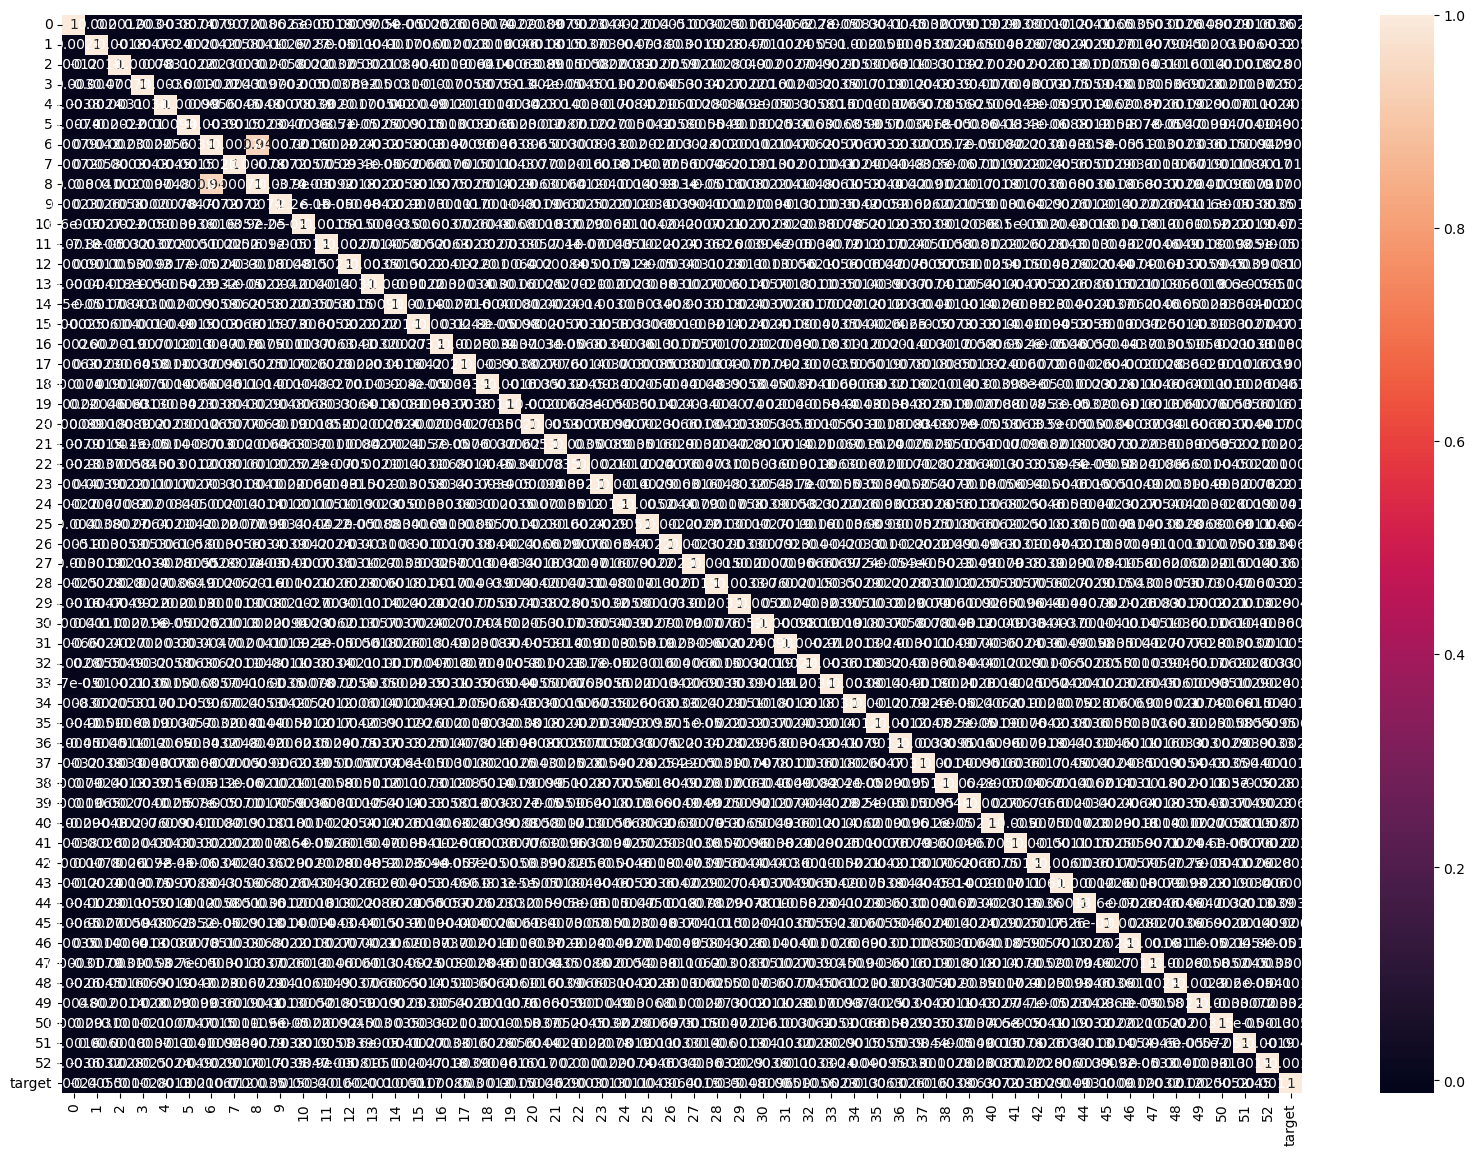

In [106]:
plt.rcParams["figure.figsize"] = (20,14)
sn.heatmap(corr_matrix, annot=True)
plt.show()

## 2. Choosing model